I need methods for:
- checking whether an independence holds in the dataset from $P(V)$

Relevant resources:
- Constraint-based Causal Discovery for Non-Linear Structural Causal Models with Cycles and Latent Confounders, Mooji et. al.
- PYCID

We model the non-linear function g{v} as a neural network with tanh activation, bias terms that have a normal distribution with mean −0.5 and standard deviation 0.2, and weights sampled uniformly from the L1-unit ball to satisfy the contraction condition of Theorem 4.1 (see also Supplementary Material, Section C). 

In [1]:
import numpy as np
import helper_functions as hf
from matplotlib import pyplot as plt
import time
import networkx as nx
from tqdm import tqdm

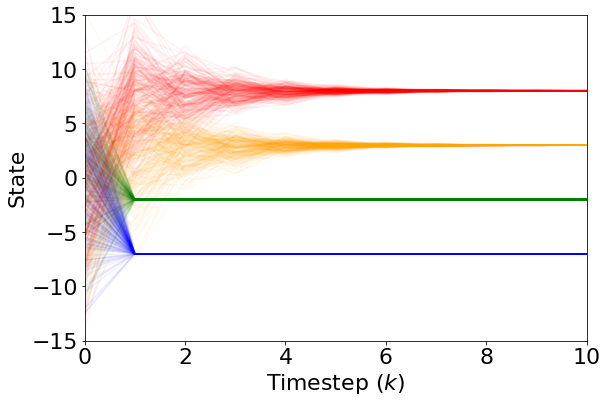

In [7]:
# cyclic
F = lambda V,A,U: A.dot(V) + U
U = np.array([-7.,-2.,2.5,7.5])
A = np.array([[0,0,0,0],[0,0,0,0],[.5,0,0,.5],[0,.5,.5,0]])
n = A.shape[0]
Adj = A > 0
colors = ['b','g','orange','r']


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
plt.axis([0, 10, -15,15])
plt.xlabel("Timestep ($k$)")
plt.ylabel("State")

structure = Adj,F,A
for k in range(70):
    equilibrium, orbits = hf.potential_response(structure,U,orbits=True)
    for orbit in orbits:
        for i in range(n):
#             if np.abs(orbit[0,i]-2.5) < 3.5:
            plt.plot(orbit[:11,i],color=colors[i],alpha=.05)
# plt.show()
plt.savefig("linear_cyclic_evolution.png")


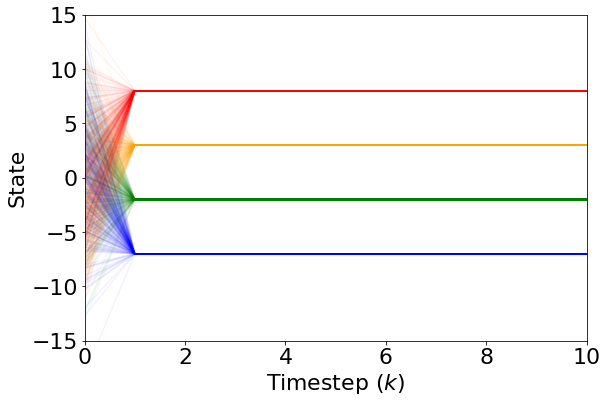

In [3]:
# acyclic
def F(V,A,U):
    U1, U2, U3, U4 = U.ravel()
    V1 = U1
    V2 = U2
    V3 = (2/3)*V1 + (1/3)*V2 + (4/3)*U3 + (2/3)*U4
    V4 = (1/3)*V1 + (2/3)*V2 + (2/3)*U3 + (4/3)*U4
    return np.array([V1,V2,V3,V4])

U = np.array([-7.,-2.,2.5,7.5])
A = np.array([[0,0,0,0],[0,0,0,0],[.5,0,0,.5],[0,.5,.5,0]])
n = A.shape[0]
Adj = A > 0
colors = ['b','g','orange','r']


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9, 6))
plt.axis([0, 10, -15,15])
plt.xlabel("Timestep ($k$)")
plt.ylabel("State")

structure = Adj,F,A
for k in range(70):
    equilibrium, orbits = hf.potential_response(structure,U,orbits=True)
    for orbit in orbits:
        adjusted = [orbit[0],orbit[1],]
        last_point = orbit[1].copy()
        for j in range(9):
            new_point = point1 = F(last_point,A*Adj,U)
            adjusted.append(new_point)
            last_point = new_point.copy()
        adjusted = np.array(adjusted)
        for i in range(n):
#             if np.abs(orbit[0,i]-2.5) < 3.5:
            plt.plot(adjusted[:11,i],color=colors[i],alpha=.05)
# plt.show()
plt.savefig("linear_acyclic_evolution.png")


In [ ]:
n = 4
collection = hf.all_graphs_fast(n)
print(len(collection))
count_with_any_d_sep = 0

for Adj in tqdm(collection):
    d_seps = list(hf.all_d_separations(Adj))
    if len(d_seps):
        count_with_any_d_sep += 1
        
print(count_with_any_d_sep)

In [ ]:
n = 4
adj_matrices = hf.nice_graphs_fast(n)

In [ ]:
i = np.random.choice(len(adj_matrices))
Adj = adj_matrices[i]
print(Adj)
DG = nx.DiGraph(Adj)
nx.draw(DG)
plt.show()

In [ ]:
DG.edges

In [ ]:
# for item in hf.all_candidate_independencies(4):
#     print(item[0], item[1], item[2])

nx's d-separation algorithm only works on acyclic graphs.

Can I express d-separation for cyclic graphs, as a series of evaluations on acyclic subgraphs of G?

Perhaps: (X indep Y | Z) in G iff (X indep Y | Z) in each subgraph where at most one edge between every pair of vertices is kept.

^If so, in the testing, have several examples that you are certain are/aren't d-separated (computed by hand). Just to be safe.

In [ ]:
Adj = np.array([[0,0,0,0],[0,0,0,0],[1,0,0,1],[0,1,1,0]])
print(Adj)
DG = nx.DiGraph(Adj.T)
nx.draw(DG)
plt.show()

In [ ]:
for d_sep in hf.all_d_separations(Adj):
    print(d_sep)

In [ ]:
type(np.array(1))

In [10]:
{0}.issubset({0,1})

True